In [ ]:
import numpy as np

# Generate a sample of 100 numbers from a standard normal distribution
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)
sample3 = np.random.normal(loc=0, scale=1, size=100)
sample4 = np.random.normal(loc=0, scale=1, size=100)
sample5 = np.random.normal(loc=0, scale=1, size=100)

In [2]:
sample1

array([ 1.18597142,  0.907405  , -1.21792093,  1.04110481, -0.46080336,
       -0.11367301, -0.81530645,  0.16741844,  0.89089869,  0.60790305,
       -0.51161858,  0.90894818, -0.83947584, -1.20487479, -0.6923296 ,
       -0.71661853, -0.2918875 , -0.47997258,  0.40542167,  0.5189128 ,
       -0.37838627,  0.03651633, -0.30169785, -0.18282514,  1.14432652,
        0.81084402, -0.90063476,  1.02846019, -0.09294539, -1.08878759,
        1.05352299,  0.44825963,  0.14590594, -1.51928518,  0.28182991,
        0.3711151 , -0.90527722,  0.12929881, -0.59714946,  0.99226228,
       -0.08632058,  1.70526807,  1.63008033,  0.63080485,  0.21691336,
       -0.55499102,  0.17530127,  1.19736751,  0.253092  ,  1.60441797,
        0.19188598,  0.14113418,  0.35742229,  0.6292023 ,  0.72733335,
       -2.33529984, -1.53368712, -1.2653627 ,  0.00933267,  0.12795348,
        0.01147552,  0.41479016, -0.56059218, -0.83242253,  2.1101266 ,
        0.50464548, -0.58748836,  0.74649445, -0.63071206, -0.73

*As you increase the number of samples, the chi-square distribution behave as normal distribution*

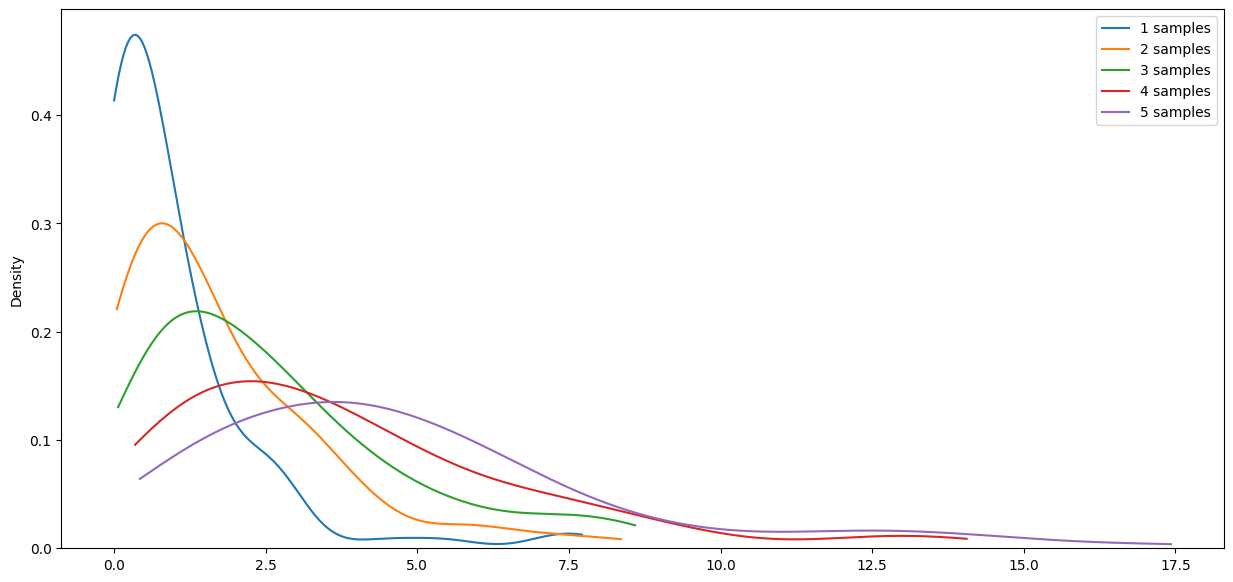

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x = sample1**2
y = sample1**2 + sample2**2
z = sample1**2 + sample2**2 + sample3**2
u = sample1**2 + sample2**2 + sample3**2 + sample4**2
v = sample1**2 + sample2**2 + sample3**2 + sample4**2 + sample5**2

plt.figure(figsize = (15, 7))
sns.kdeplot(x, clip=(x.min(),x.max()))
sns.kdeplot(y, clip=(y.min(),y.max()))
sns.kdeplot(z, clip=(z.min(),z.max()))
sns.kdeplot(u, clip=(u.min(),u.max()))
sns.kdeplot(v, clip=(v.min(),v.max()))
plt.legend([f"{i} samples" for i in range(1,6)])
plt.show()

In [1]:
import scipy.stats as stats

test_statistic = 9.95  # Chi-Square test statistic from the previous example
degrees_of_freedom = 4  # Degrees of freedom from the previous example

# Calculate the p-value using the chi2 survival function (sf)
p_value = stats.chi2.sf(0.0015, 3)

print("P-value:", p_value)

ModuleNotFoundError: No module named 'scipy'

---

### Chi-Square Test for `Goodness of Fit`

#### Assumptions of the Chi-Square Goodness of Fit Test

- **One Categorical Variable**: The data must consist of a single categorical variable with two or more levels or categories[^2][^3][^7].
- **Mutually Exclusive Categories**: Each observation must fall into one and only one category; categories must not overlap[^2].
- **Independence of Observations**: Each observation should be independent of all others; the occurrence of one outcome does not affect the probability of another[^2][^7].
- **Expected Frequency**: Each category should have an expected frequency of at least 5 to ensure the validity of the test results[^1][^2][^4][^7].
- **Random Sampling**: The sample should be randomly selected from the population to generalize results appropriately[^4][^7].

These assumptions must be satisfied to ensure the reliability and validity of the chi-square goodness of fit test results.

<div style="text-align: center">⁂</div>

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Count passengers in each class
class_counts = data['Pclass'].value_counts().sort_index()
class_counts

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [12]:
# Calculate the expected counts assuming a uniform distribution
total_passengers = len(data)
expected_counts = total_passengers / 3
expected = [expected_counts] * 3
print("Expected Passenger Counts (assuming uniform distribution):", expected)

Expected Passenger Counts (assuming uniform distribution): [297.0, 297.0, 297.0]


In [13]:
# Perform the Chi-Square Goodness of Fit test
chi2, p_value = chisquare(class_counts, expected)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))


Chi-Square Statistic: 191.80
P-value: 0.0000


In [14]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The distribution of passengers among the classes is not uniform.")
else:
    print("\nWe fail to reject the null hypothesis. The distribution of passengers among the classes is uniform.")


We reject the null hypothesis. The distribution of passengers among the classes is not uniform.


---

### Chi-Square Test for `Independence / Associaton`

#### Assumptions of the Chi-Square Test for Independence

- **Both Variables Are Categorical:** The test requires two variables, each measured at a nominal or ordinal (categorical) level. Continuous variables are not appropriate for this test.
- **Independence of Observations:** Each observation must be independent of the others; that is, no individual or item should be counted in more than one cell of the contingency table.
- **Random Sampling:** The data should be obtained from a simple random sample of the population to ensure that the results are generalizable.
- **Expected Frequency:**
    - Each cell in the contingency table should have an expected count of at least 5 for the test to be reliable.
    - At minimum, no expected cell frequency should be less than 1, and at least 80% of cells should have expected frequencies of 5 or more.
- **Data Are Frequencies (Counts):** The values in the contingency table should be raw counts (frequencies), not percentages, proportions, or other derived statistics.

These assumptions must be met to ensure the validity and reliability of the chi-square test for independence.

<div style="text-align: center">⁂</div>

In [15]:
# We will use the Chi-Square test for independence to see if the survival rate of passengers is independent of the passenger class.
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
contingency_table = pd.crosstab(data['Survived'], data['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [17]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p_value))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies: \n{}".format(expected))


Chi-Square Statistic: 102.89
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [18]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between passenger class and survival rate.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between passenger class and survival rate.")


We reject the null hypothesis. There is a significant association between passenger class and survival rate.
